<a href="https://colab.research.google.com/github/kylama/musicrecognition/blob/main/MaSridharMusicCategorizationGMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

pca = PCA(n_components = 1, random_state = 3)

In [178]:
# Accessing the csv file

df = pd.read_csv('songs_normalize.csv')

xDf = df[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
yDf = df['genre']

rng = np.random.RandomState(seed=1)

# X = np.concatenate(rng.normal(xDf)).reshape(-1, 1)
# print(X.shape)

scaler = StandardScaler()
scaler.fit(xDf)
X_scaled = scaler.transform(xDf)
print(X_scaled.shape)

pca.fit(X_scaled) # Fits the PCA model according to the data
X_reduced = pca.transform(X_scaled) # Transforms the 4D array to a 2D array and assigns to a new variable
print(X_reduced.shape)

display(xDf)
display(yDf)

print(xDf.shape)

(2000, 10)
(2000, 1)


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.751,0.834,1,-5.444,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,0.434,0.897,0,-4.918,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,0.529,0.496,7,-9.007,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,0.551,0.913,0,-4.063,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,0.614,0.928,8,-4.806,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...
1995,0.842,0.734,1,-5.065,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,0.847,0.678,9,-8.635,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,0.741,0.520,8,-7.513,0.0656,0.4500,0.000002,0.2220,0.347,102.998


,genre
0,pop
1,"rock, pop"
2,"pop, country"
3,"rock, metal"
4,pop
...,...
1995,pop
1996,pop
1997,"hip hop, country"
1998,pop


(2000, 10)


In [179]:
# Fitting the model with 10 components
k_arr = np.arange(10) + 1
models = []
for k in k_arr:
  models.append(GaussianMixture(n_components=k).fit(X_reduced))

In [180]:
# Plot function
def plot_mixture(gmm, X, show_legend=True, ax=None):
    if ax is None:
        ax = plt.gca()

    # Compute PDF of whole mixture
    x = np.linspace(-6, 6, 1000)
    logprob = gmm.score_samples(x.reshape(-1, 1))
    pdf = np.exp(logprob)

    # Compute PDF for each component
    responsibilities = gmm.predict_proba(x.reshape(-1, 1))
    pdf_individual = responsibilities * pdf[:, np.newaxis]

    # Plot data histogram
    ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4, label='Data')

    # Plot PDF of whole model
    ax.plot(x, pdf, '-k', label='Mixture PDF')

    # Plot PDF of each component
    ax.plot(x, pdf_individual, '--', label='Component PDF')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$p(x)$')
    if show_legend:
        ax.legend()

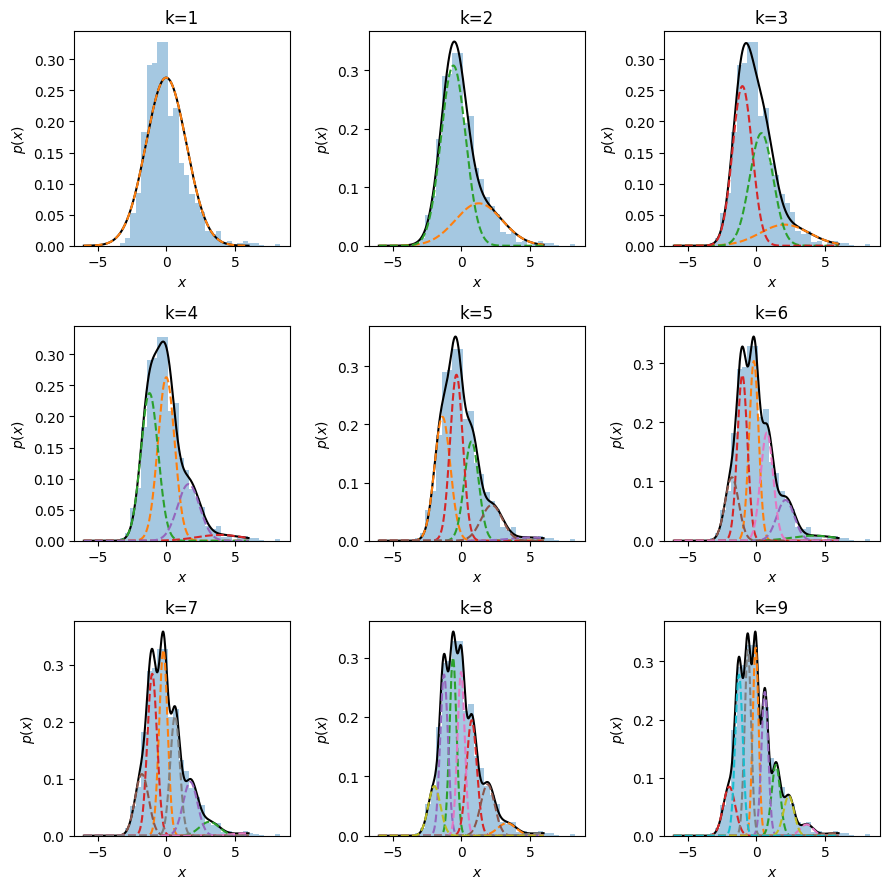

In [181]:
# Show all models for n_components 1 to 9
_, axes = plt.subplots(3, 3, figsize=np.array([3,3])*3, dpi=100)
for gmm, ax in zip(models, axes.ravel()):
    plot_mixture(gmm, X_reduced, show_legend=False, ax=ax)
    ax.set_title(f'k={gmm.n_components}')
plt.tight_layout()

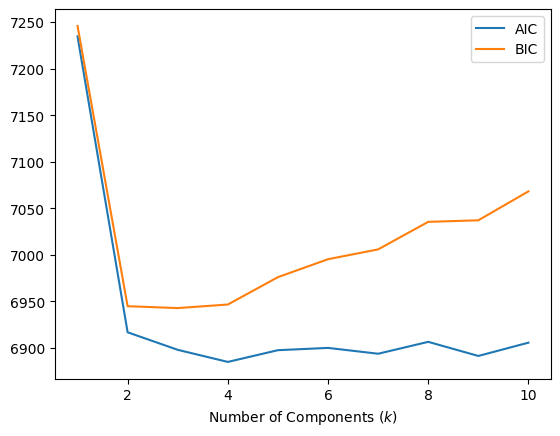

In [182]:
# Compute metrics to determine best hyperparameter
AIC = [m.aic(X_reduced) for m in models]
BIC = [m.bic(X_reduced) for m in models]

# Plot these metrics
plt.plot(k_arr, AIC, label='AIC')
plt.plot(k_arr, BIC, label='BIC')
plt.xlabel('Number of Components ($k$)')
plt.legend()

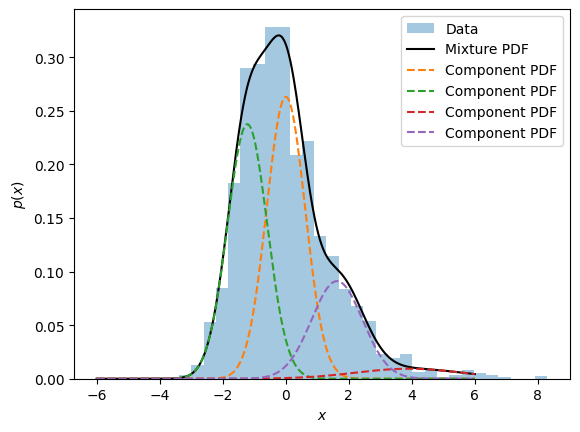

In [183]:
# Choose AIC because it converges closer towards the x-axis
gmm_best = models[3] # Choose k = 3 because in AIC graph, k = 3 is the elbow of the curve
plot_mixture(gmm_best, X_reduced)

(-12.101033665477466,
 11.739254699778972,
 -10.820509052356998,
 10.513409940905792)

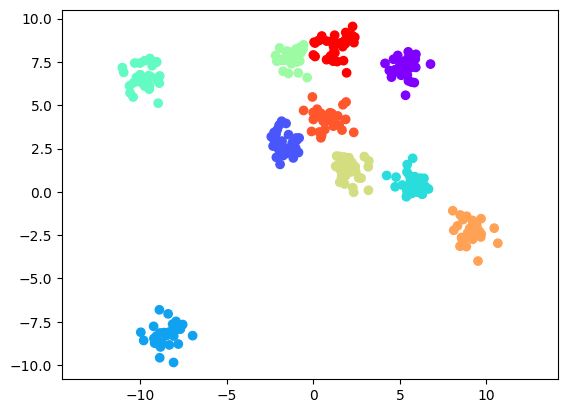

In [184]:
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
X3, y_true = make_blobs(n_samples = 300, centers = 10, cluster_std = 0.60, random_state = 0)

gmm = GaussianMixture(n_components = 10, random_state = 0).fit(X3)
gmm_labels = gmm.predict(X3)
plt.scatter(X3[:,0], X3[:,1], c=gmm_labels, cmap='rainbow')
plt.axis('equal')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(-121.01033665477466,
 117.39254699778972,
 -10.820509052356998,
 10.513409940905792)

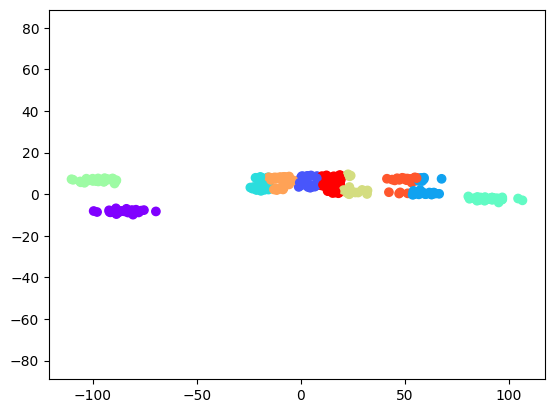

In [185]:
from sklearn.cluster import KMeans
X3[:, 0] = X3[:, 0]*10

kmeans = KMeans(n_clusters=10, random_state=0).fit(X3)
plt.scatter(X3[:,0], X3[:,1], c=kmeans.labels_, cmap='rainbow')
plt.axis('equal')